# Week 3

### Part 1

#### Exercises to the text:

    What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

Random network would lack outliers. In a large random network the degree of most nodes is in the narrow vicinity of ‹k›
    
    List the four regimes that characterize random networks as a function of ⟨k⟩
    
All networks, Internet, Science Collaboration and Protein Interactions

    According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?
    
Random network model does not capture the clustering of real networks.

#### Exercise:  WS edition

### Part 2

#### Exercises: BA edition.

    What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.
    
1. Anomalous Regime  (γ ≤ 2):

For a large N the degree of the largest hub must exceed the total number of nodes in the network. It will run out of nodes to connect to and can therefore not exist.  

2. Scale-Free Regime (2 ‹ γ ‹ 3):

It is scale-free networks in this regime and they are very small. K_max/N will represent the fraction of nodes that connects to the hub. 

3. Random Network Regime (γ › 3)

For practical purposes the properties of a scale-free network in this regime are difficult to distinguish. For large γ the degree distribution p_k decays sufficiently fast to make the hubs small and less numerous.

    
    What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

1. Sublinear Regime (0 < α < 1)

This degree distribution will result in fewer and smaller hubs than in a scale-free network

2. Linear(α = 1)

The degree distribution will typically follows the power law (many low-degree nodes, few high-degree nodes).

3. Superlinear (α > 1)

In this configuration the earliest nodes become super hubs and all subsequent nodes will link to these super hubs.


#### Barabasi-Albert model

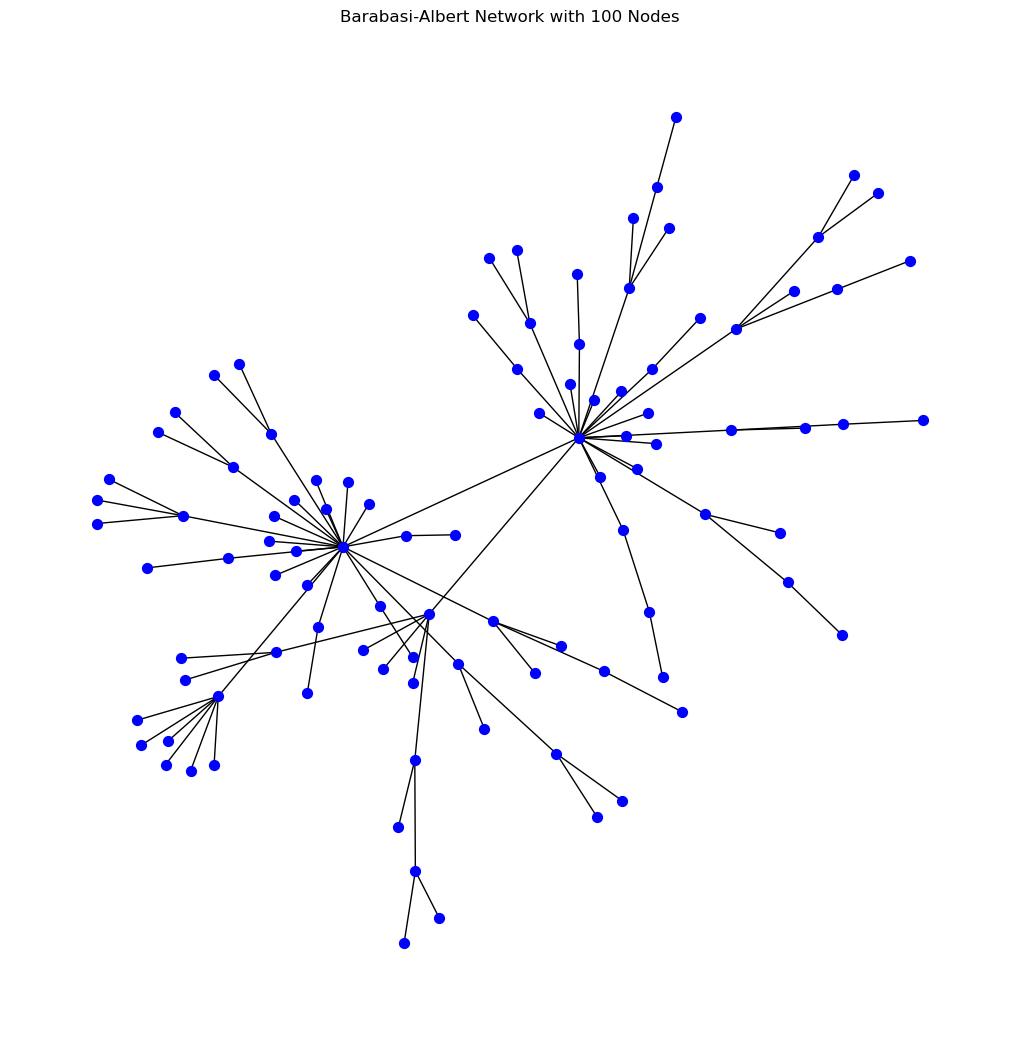

Maximum Degree: 165
Minimum Degree: 1


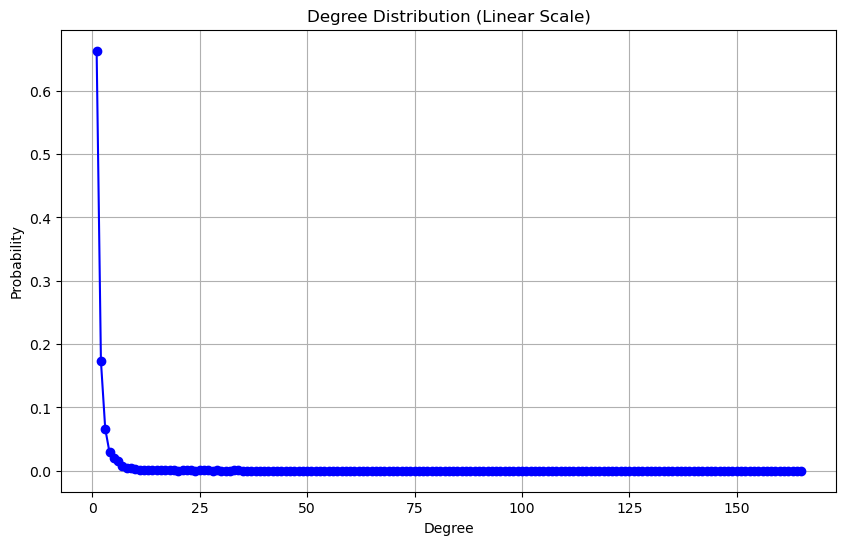

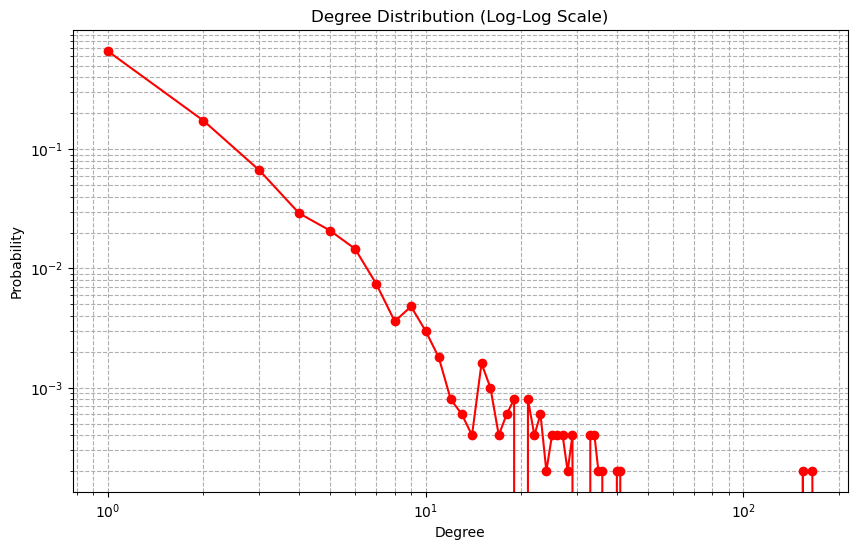

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# Create an initial graph with a single link (connecting 0 and 1)
G = nx.Graph()
G.add_edge(0, 1)

# Add nodes, connecting each to the existing nodes with probability proportional to their degree
def add_node_with_preferential_attachment(G, new_node):
    
    degrees = [node for node, degree in G.degree() for _ in range(degree)]
    
    # attach the new node to existing node
    chosen_node = random.choice(degrees)
    G.add_edge(new_node, chosen_node)

# Keep going until you have a 100 node network.
for i in range(2, 100):
    add_node_with_preferential_attachment(G, i)

# Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=50, node_color='blue', with_labels=False)
plt.title('Barabasi-Albert Network with 100 Nodes')
plt.show()

# Add more nodes until you have a 5000 node network.
for i in range(100, 5000):
    add_node_with_preferential_attachment(G, i)

# What's the maximum and minimum degree?
degrees = [degree for node, degree in G.degree()]
max_degree = max(degrees)
min_degree = min(degrees)

print(f"Maximum Degree: {max_degree}")
print(f"Minimum Degree: {min_degree}")

# Now, bin the degree distribution using numpy.histogram.
hist, bin_edges = np.histogram(degrees, bins=range(min_degree, max_degree + 2), density=True)

# Plot the distribution in linear 
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], hist, 'b-', marker='o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (Linear Scale)')
plt.grid(True)
plt.show()

# Plot the distribution in log-log axes.
plt.figure(figsize=(10, 6))
plt.loglog(bin_edges[:-1], hist, 'r-', marker='o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (Log-Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()
